In [11]:
import networkx as nx
import matplotlib.pyplot as plt

In [12]:
G = nx.Graph()

G.add_nodes_from( [ "Arad", "Bucharest", "Oradea", "Zerind", "Sibiu", "Timisoara", "Lugoj", "Mahadia", "Dobreta", "Rimnicu Vilcea", "Craiova", "Pitesti", "Fagaras", "Giurgiu", "Urziceni", "Hirsova", "Eforie", "Vaslui", "Iasi", "Neamt"])

In [17]:
edges = [ ( "Arad", "Zerind", 75), ( "Arad", "Sibiu", 140), ( "Arad", "Timisoara", 118), ( "Bucharest", "Fagaras", 211), ( "Bucharest", "Urziceni",85), ( "Bucharest", "Giurgiu",90), ( "Bucharest", "Pitesti",101), ( "Craiova", "Dobreta",120), ( "Craiova", "Pitesti",138), ( "Craiova","Rimnicu Vilcea", 146), ( "Dobreta", "Mehadia", 75), ( "Eforie", "Hirsova", 86), ( "Fagaras", "Sibiu", 99), ("Fagaras", "Bucharest", 211), ( "Hirsova", "Urziceni", 98), ( "Iasi", "Neamt", 87), ( "Iasi", "Vaslui", 92), ( "Lugoj", "Mehadia", 70), ( "Lugoj", "Timisoara",111), ( "Oradea", "Zerind", 71), ( "Oradea", "Sibiu", 151), ( "Pitesti", "Rimnicu Vilcea", 97), ( "Rimnicu Vilcea", "Sibiu",80), ( "Urziceni", "Vaslui",142)] #add remaining edges to the list

for edge in edges:
    G.add_edge( edge[0], edge[1], weight=edge[2])

In [18]:
lat_long = {
    'Arad': (46.1667, 21.3167), 'Bucharest': (44.4167, 26.1000),
    'Craiova': (44.3333, 23.8167), 'Drobeta': (44.6259, 22.6566),
    'Eforie': (44.0667, 28.6333), 'Fagaras': (45.8416, 24.9730),
    'Giurgiu': (43.9037, 25.9699), 'Hirsova': (44.6833, 27.9500),
    'Iasi': (47.1585, 27.6014), 'Lugoj': (45.6904, 21.9033),
    'Neamt': (46.9283, 26.3705), 'Oradea': (47.0553, 21.9214),
    'Pitesti': (44.8565, 24.8697), 'Rimnicu Vilcea': (45.1042, 24.3758),
    'Sibiu': (45.7977, 24.1521), 'Timisoara': (45.7489, 21.2087),
    'Urziceni': (44.7167, 26.6333), 'Vaslui': (46.6333, 27.7333),
    'Zerind': (46.6225, 21.5174)
}

In [19]:
# Set node positions using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

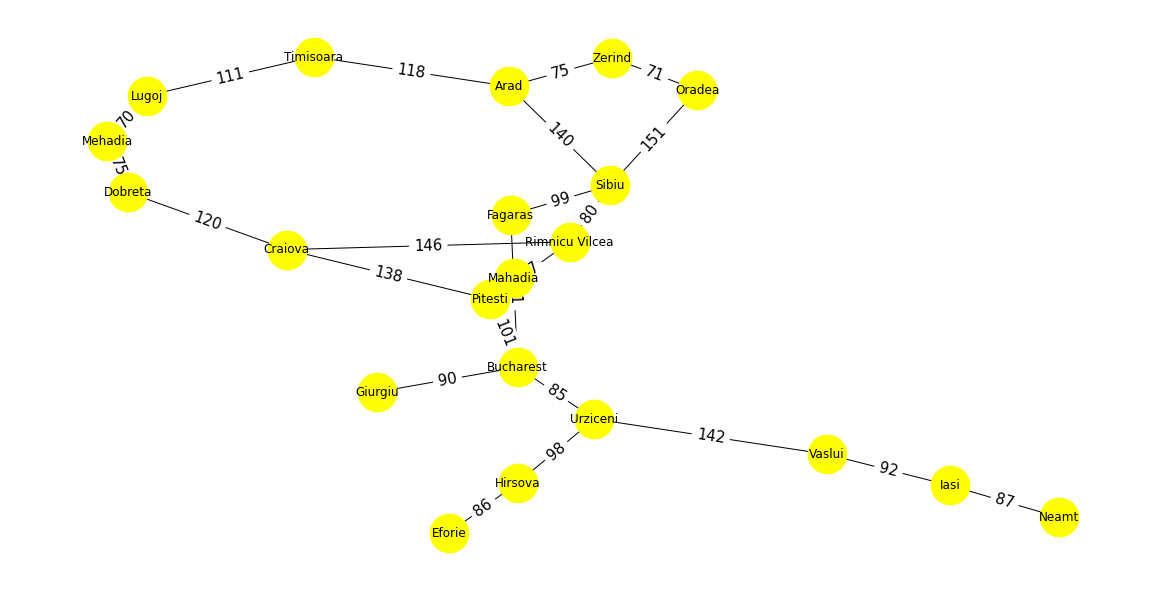

In [20]:
# Draw graph with labels and edge weights
plt.figure(figsize=(16, 8))
nx.draw(G, pos, with_labels=True, font_size=12, node_size= 1500, node_color ="yellow")

edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15)

plt.show()

In [21]:
import math
import heapq

def calculate_distance(city1, city2):
    lat1, long1 = lat_long[city1]
    lat2, long2 = lat_long[city2]
    lat_diff = math.radians(lat2 - lat1)
    long_diff = math.radians(long2 - long1)
    a = math.sin(lat_diff / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(long_diff / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = 6371 * c  # Radius of the Earth in kilometers
    return distance

def astar(start, goal):
    open_list = [(0, start)]  # Priority queue with (f, node) tuples
    closed_list = set()
    g_scores = {start: 0}  # Cost from start node to current node
    f_scores = {start: calculate_distance(start, goal)}  # Estimated total cost from start to goal through current node

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            # Goal reached
            return reconstruct_path(current), g_scores[current]

        closed_list.add(current)

        for neighbor in G.neighbors(current):
            if neighbor in closed_list:
                continue

            g_score = g_scores[current] + G[current][neighbor]['weight']
            if neighbor not in g_scores or g_score < g_scores[neighbor]:
                g_scores[neighbor] = g_score
                f_scores[neighbor] = g_score + calculate_distance(neighbor, goal)

                heapq.heappush(open_list, (f_scores[neighbor], neighbor))

    # No path found
    return None, math.inf

def reconstruct_path(current):
    path = [current]
    while current in backpointers:
        current = backpointers[current]
        path.append(current)
    path.reverse()
    return path

start_node = "Arad"
goal_node = "Bucharest"

backpointers = {}
path, distance = astar(start_node, goal_node)

if path:
    print("A* path found:")
    print(" -> ".join(path))
    print(f"Distance: {distance:.2f} kilometers")
else:
    print("No path found.")

A* path found:
Bucharest
Distance: 418.00 kilometers
